### Data Dictionary
- `survival`: 0 = No, 1 = Yes

- `pclass`: Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

- `Age`: Age in years 	

- `sibsp`: number of siblings / spouses aboard the Titanic 	

- `parch`: number of parents / children aboard the Titanic 	

- `IsMale`: 0 = No, 1 = Yes

- `fare`: Passenger fare 	

- `embarked`: Port of Embarkatio C = Cherbourg, Q = Queenstown, S = Southampton


### Import the essential libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
SEED = np.random.seed(9)

In [89]:
path = '../../data/processed/'

train = pd.read_csv(f'{path}train_processed.csv')
test = pd.read_csv(f'{path}test_processed.csv')

In [90]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,1,0,0


In [91]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,1,0,0,1
414,1306,1,39.0,0,0,108.9000,0,1,0,0
415,1307,3,38.5,0,0,7.2500,1,0,0,1
416,1308,3,27.0,0,0,8.0500,1,0,0,1


- Plotting a boxplot of the variables to see their scale now that we only have numerical columns

- Removing the `PassengerId` column, as its values don't hold any particular meaning other than being sequential IDs for passengers

In [92]:
boxplot_df = train.drop(columns='PassengerId')
boxplot_df

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


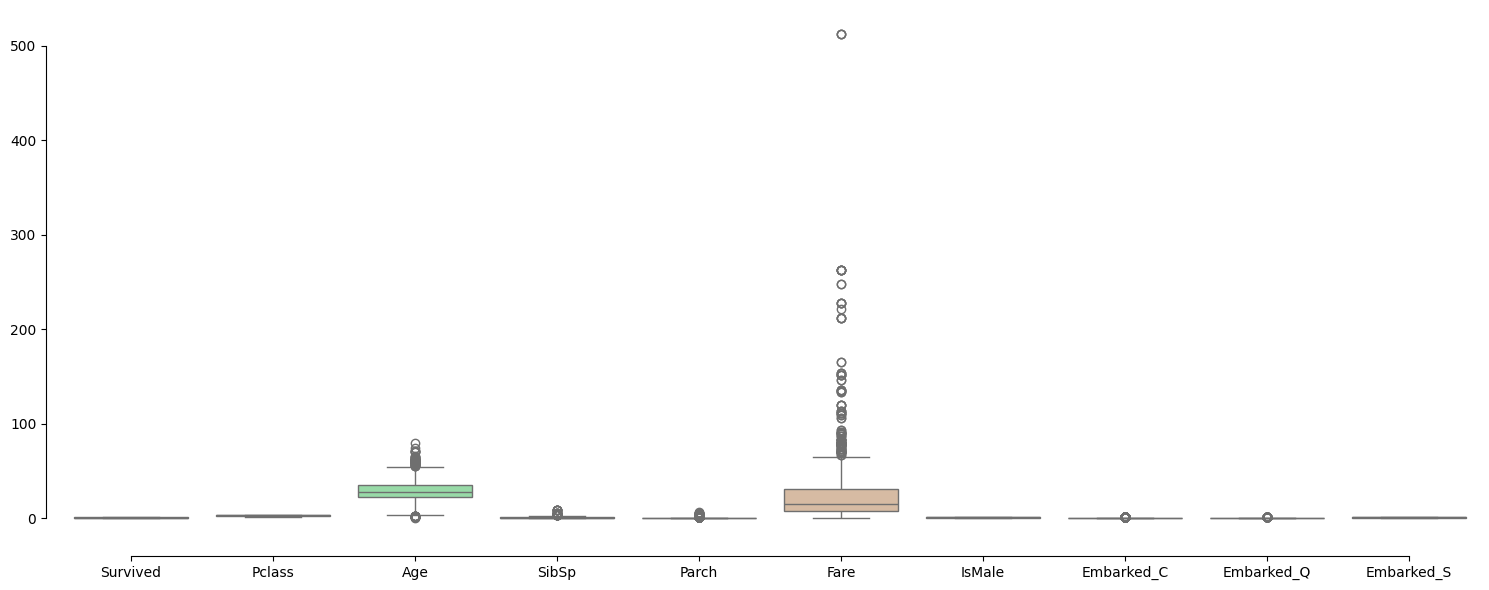

In [93]:
f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=boxplot_df,  ax=ax)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

- The values are highly disparate, which can interfere with the machine learning model. We need to perform normalization

- We'll use **RobustScaler**

### Preprocessing

In [94]:
from sklearn.preprocessing import RobustScaler

def transform_scaler(data):
    transformer = RobustScaler().fit(data[['Age','Fare']])
    return transformer.transform(data[['Age','Fare']])

train[['Age','Fare']] = transform_scaler(train)
test[['Age','Fare']] = transform_scaler(test)

In [95]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,-0.461538,1,0,-0.312011,1,0,0,1
1,2,1,1,0.769231,1,0,2.461242,0,1,0,0
2,3,1,3,-0.153846,0,0,-0.282777,0,0,0,1


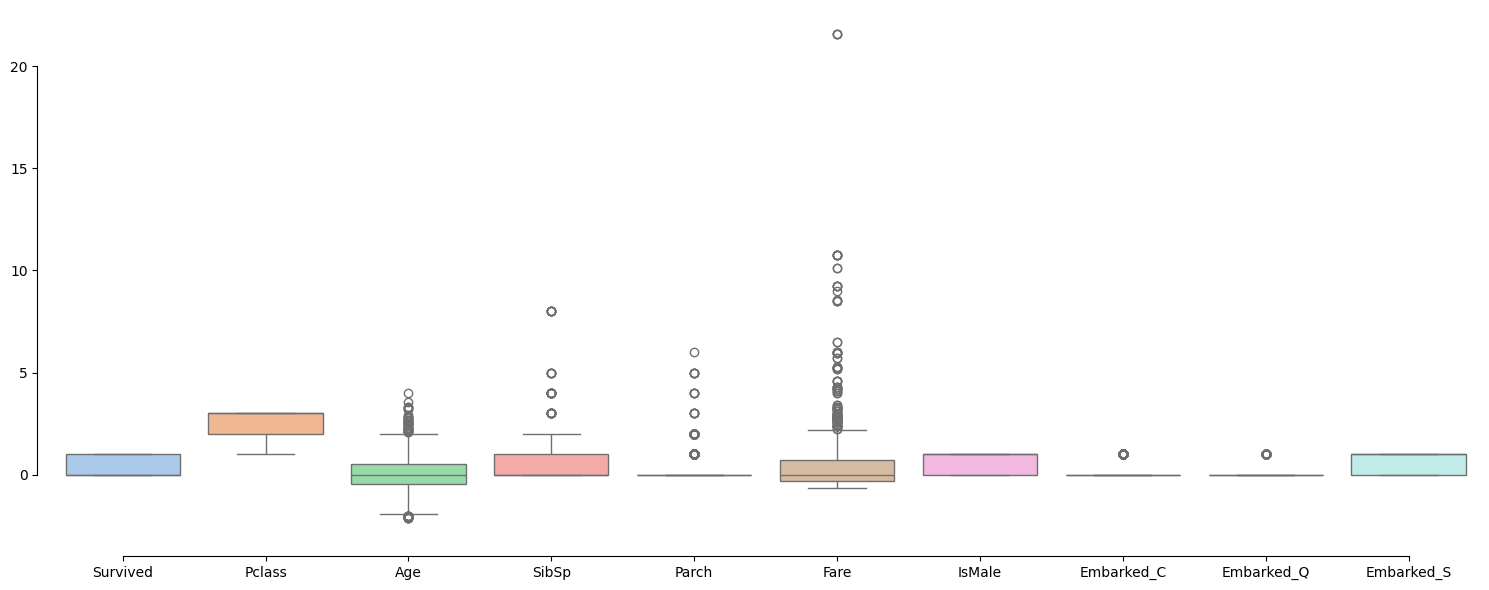

In [96]:
bp_df = train.drop(columns='PassengerId')

f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=bp_df,  ax=ax)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

- Agora os valores estão mais normalizados e isso torna melhor para nosso modelo de machine learning

### Explorando as colunas SibSp e Parch

#### SibSp

In [97]:
SibSp_df = train.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()

SibSp_df.columns = ['SibSp','Live','Total','Percentual']
SibSp_df

,SibSp,Live,Total,Percentual
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


#### Parch

In [98]:
Parch_df = train.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()

Parch_df.columns = ['Parch','Live','Total','Percentual']
Parch_df

,Parch,Live,Total,Percentual
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


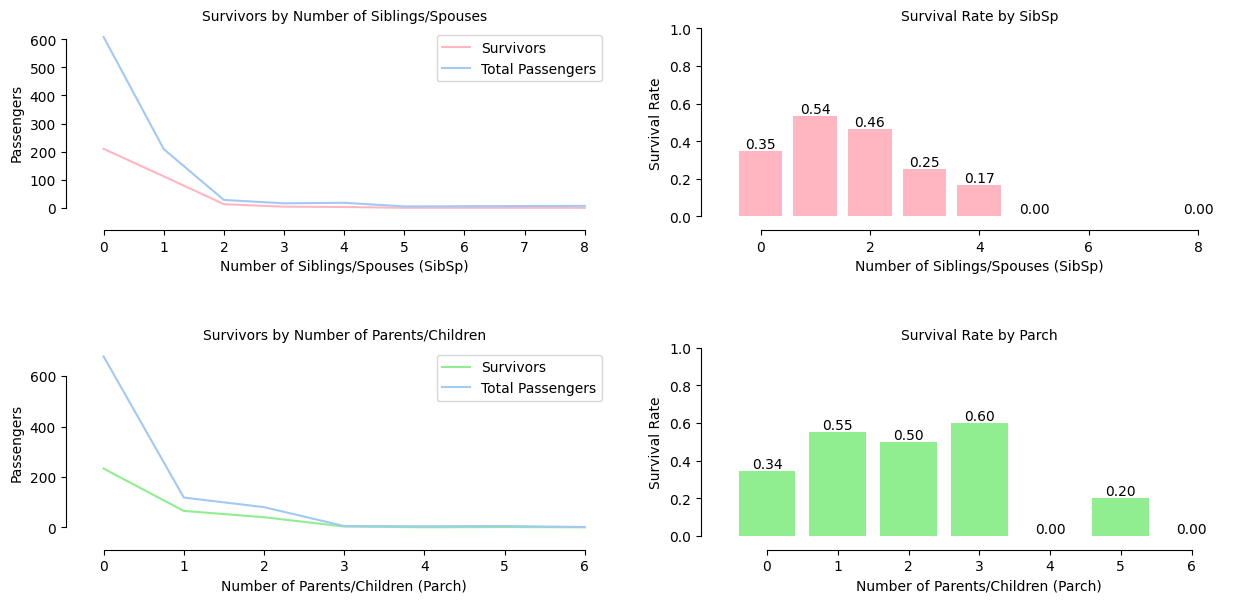

In [99]:
def plot_survival_analysis(df1, df2, title1, title2):
    """
    Args:
        df1 (pandas.DataFrame): The DataFrame 
        df2 (pandas.DataFrame): The DataFrame 
        title1 (str): The title for the SibSp subplot.
        title2 (str): The title for the Parch subplot.
    """

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.5, 6))

    # Unpack axes into individual variables 
    ax1, ax2, ax3, ax4 = axes.flat

    # SibSp analysis (top row)
    ax1.plot(df1['SibSp'], df1['Live'], label='Survivors', color='lightpink')  # Use 'Survivors' for clarity
    ax1.plot(df1.SibSp, df1.Total, label='Total Passengers')
    ax1.set_title(title1, fontsize=10)
    ax1.set_xlabel('Number of Siblings/Spouses (SibSp)')
    ax1.set_ylabel('Passengers')
    ax1.legend()

    # SibSp survival rate (top right)
    ax2.bar(df1['SibSp'], df1['Percentual'], color='lightpink')
    ax2.bar_label(ax2.containers[0], fmt="%.02f")  
    ax2.set_title('Survival Rate by SibSp', fontsize=10)
    ax2.set_xlabel('Number of Siblings/Spouses (SibSp)')
    ax2.set_ylabel('Survival Rate')
    ax2.set_ylim(0, 1)  # Adjust y-axis limits for better visualization

    # Parch analysis (bottom row)
    ax3.plot(df2['Parch'], df2['Live'], label='Survivors', color='lightgreen')
    ax3.plot(df2.Parch, df2.Total, label='Total Passengers')
    ax3.set_title(title2, fontsize=10)
    ax3.set_xlabel('Number of Parents/Children (Parch)')
    ax3.set_ylabel('Passengers')
    ax3.legend()

    # Parch survival rate (bottom right)
    ax4.bar(df2['Parch'], df2['Percentual'], color='lightgreen')
    ax4.bar_label(ax4.containers[0], fmt="%.02f")  
    ax4.set_title('Survival Rate by Parch', fontsize=10)
    ax4.set_xlabel('Number of Parents/Children (Parch)')
    ax4.set_ylabel('Survival Rate')
    ax4.set_ylim(0, 1)  

    # Improve plot aesthetics using seaborn
    plt.tight_layout()  # Adjust spacing between subplots and figure edges
    sns.despine(offset=10, trim=True)  # Remove unnecessary chart elements for cleaner look
    plt.subplots_adjust(hspace=0.7, wspace=0.2)  # Adjust spacing between subplots vertically

    plt.show()

plot_survival_analysis(SibSp_df, Parch_df, 'Survivors by Number of Siblings/Spouses', 'Survivors by Number of Parents/Children')


### Relatives column

- Creating a Column to Check if a Passenger is Alone or Traveling with Family

In [100]:
train['Relatives'] = train['SibSp'] + train['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   IsMale       891 non-null    int64  
 8   Embarked_C   891 non-null    int64  
 9   Embarked_Q   891 non-null    int64  
 10  Embarked_S   891 non-null    int64  
 11  Relatives    891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [102]:
train.sample(2, random_state=SEED)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S,Relatives
132,133,0,3,1.461538,1,0,0.001984,0,0,0,1,1
561,562,0,3,0.923077,0,0,-0.284041,1,0,0,1,0


- Checking Survival for Family Members

In [103]:
Relatives_df = train.groupby('Relatives')['Survived'].agg(
    ['sum','count','mean']).reset_index()

Relatives_df.columns = ['Relatives','Live','Total','Percentual']
Relatives_df

,Relatives,Live,Total,Percentual
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


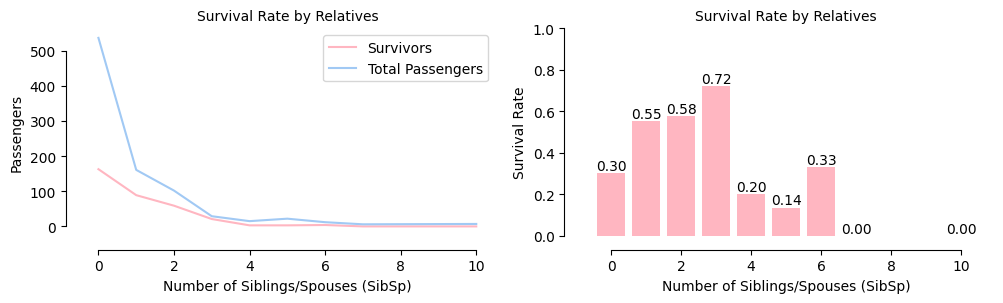

In [104]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3))

# Analysis (left)
ax[0].plot(Relatives_df['Relatives'], Relatives_df['Live'], 
           label='Survivors', color='lightpink') 

ax[0].plot(Relatives_df['Relatives'], Relatives_df['Total'], 
           label='Total Passengers')

ax[0].set_title('Survival Rate by Relatives', fontsize=10)
ax[0].set_xlabel('Number of Siblings/Spouses (SibSp)')
ax[0].set_ylabel('Passengers')
ax[0].legend()

# Survival rate (right)
ax[1].bar(Relatives_df['Relatives'], Relatives_df['Percentual'], 
          color='lightpink')

ax[1].bar_label(ax[1].containers[0], fmt="%.02f")  

ax[1].set_title('Survival Rate by Relatives', fontsize=10)
ax[1].set_xlabel('Number of Siblings/Spouses (SibSp)')
ax[1].set_ylabel('Survival Rate')
ax[1].set_ylim(0, 1) 

plt.tight_layout()  # Adjust spacing between subplots and figure edges
sns.despine(offset=10, trim=True)  # Remove unnecessary chart elements for cleaner look
plt.subplots_adjust(hspace=0.5, wspace=0.2)  # Adjust spacing between subplots vertically
plt.show()

### Analyzing the correlation between variables

In [105]:
tr_corr = train.corr()

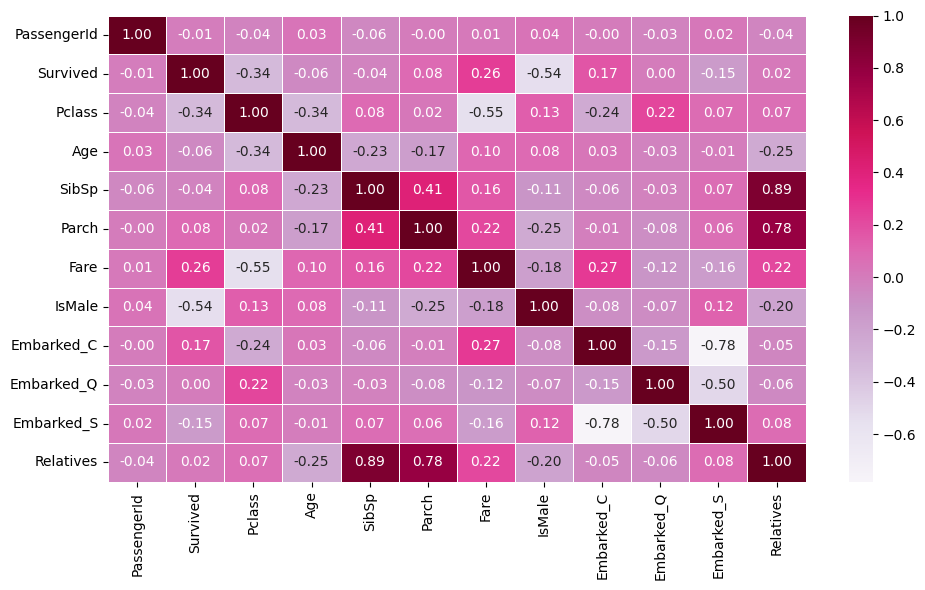

In [106]:
fig, ax = plt.subplots(figsize=(10,6))


sns.heatmap(tr_corr, annot=True, fmt=".2f", linewidths=0.5, cmap="PuRd" , ax=ax)
plt.tight_layout()  
plt.show()

Understanding the relationship between Pclass and Fare, we can see from the graph above that there is a very strong correlation between these two columns.

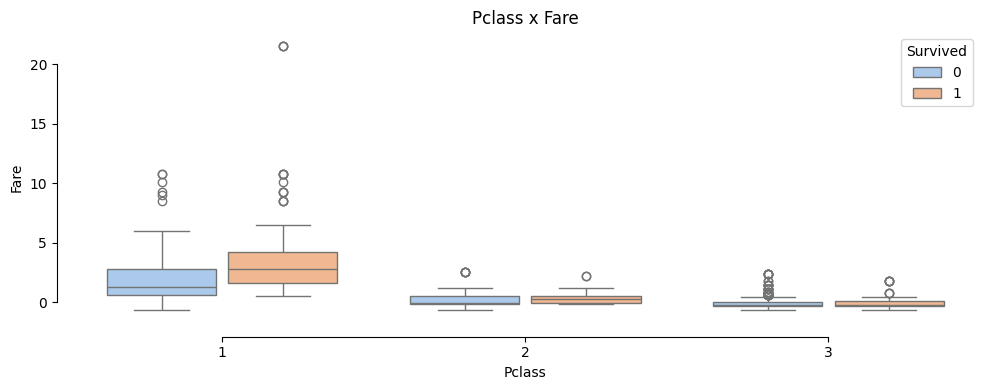

In [107]:
fig, ax = plt.subplots(figsize=(10,4))

sns.boxplot(data=train, x='Pclass', y='Fare', hue='Survived',
            gap=.1, ax=ax).set(title='Pclass x Fare')
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

Looking at the graph, we notice that there are individuals in the first class who paid very little for their tickets; they paid an amount equivalent to people in the third class.

The graph also shows that people in the first class are more likely to survive.


### The survival rate by Pclass (Passenger class)

- Let's check the survival rate in each of the classes.

In [108]:
train.groupby('Pclass')['Survived'].mean().round(2)

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

In [109]:
train.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max']).round(2)

min  mean    max
Pclass Survived                   
1      0        -0.63  2.18  10.76
       1         0.50  3.51  21.56
2      0        -0.63  0.21   2.56
       1        -0.17  0.33   2.19
3      0        -0.63 -0.03   2.39
       1        -0.63 -0.03   1.82

### New Encoder - OrdinalEncoder

- Function to apply ordinal encoding to the Embarked column

In [122]:
from sklearn.preprocessing import OrdinalEncoder

def apply_ordinal_encoding(df):    
    cat = ['S','C','Q']
    ord_enc = OrdinalEncoder(categories=[cat],dtype='int32')
    ord_enc = ord_enc.fit(df[['Embarked']])
    df = ord_enc.transform(df[['Embarked']])

    return df 

- Restoring the original Embarked column to apply another encoder on it

In [110]:
path_raw = "../../data/raw/"

# Raw Data
original_tr = pd.read_csv(f"{path_raw}train.csv")
original_tt = pd.read_csv(f"{path_raw}test.csv")

train = pd.concat([train, original_tr['Embarked']], axis=1)
mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode)

test = pd.concat([test, original_tt['Embarked']], axis=1)

In [112]:
train['Embarked'] = apply_ordinal_encoding(train)
test['Embarked'] = apply_ordinal_encoding(test)

- Dropping the `Embarked` columns created by the other encoder

In [115]:
train = train.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
test = test.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)

- Visualizing the dataframes after the modifications

In [120]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Relatives,Embarked
0,1,0,3,-0.461538,1,0,-0.312011,1,1,0
1,2,1,1,0.769231,1,0,2.461242,0,1,1
2,3,1,3,-0.153846,0,0,-0.282777,0,0,0


In [119]:
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsMale,Relatives,Embarked
0,892,3,0.588235,0,0,-0.280670,1,0,2
1,893,3,1.568627,1,0,-0.315800,0,1,0
2,894,2,2.745098,0,0,-0.201943,1,0,2


### Saving the feature engineering data

In [124]:
train_engineering = train
test_engineering = test

In [128]:
path_pro = '../../data/processed/'

train_engineering.to_csv(f'{path_pro}train_processed.csv', index=False)
test_engineering.to_csv(f'{path_pro}test_processed.csv', index=False)